In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'C:\Users\J20032\Documents\AMEC_CAB_RAW_20190520.xlsx')

cnts = []

for x in df['Part Number'].unique():
    cnt = df[df['Part Number'] == x].shape[0]
    cnts = cnts + [{'PN':x, 'cnt':cnt}]

cnts = sorted(cnts, key = lambda i: i['cnt'], reverse = True)

df['Date'] = df['QN Item Created Date'].apply(lambda row: pd.to_datetime(str(row)).strftime('%Y-%m-%d'))

In [6]:
top10 = cnts[0:10]

ValueError: Could not interpret input 'Date'

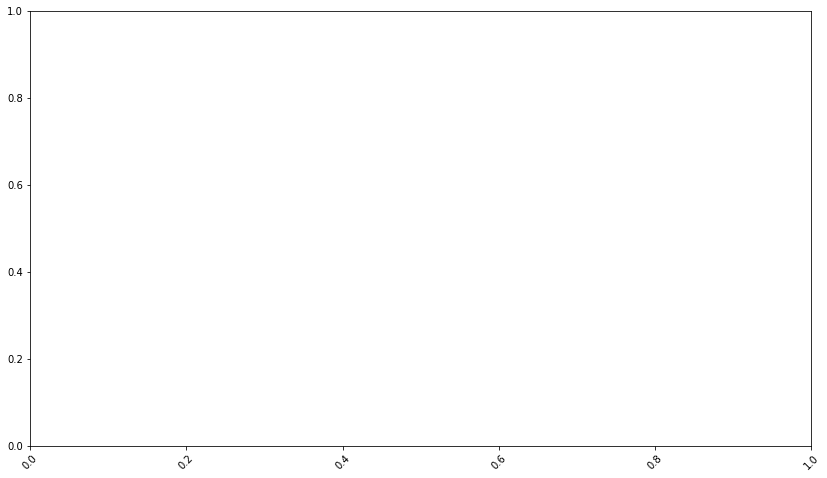

In [8]:
df_days = df.set_index('Date')

# counts = df.groupby(['Part Number', 'Date']).agg(len)
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)

cols = ['Date','Count']

sets = []

for p in top10:
    tab = []
    for d in df['Date'].unique():
        count = df[(df['Part Number'] == p) & (df['Date'] == d)].shape[0]
        tab = tab + [[d, count]]
    table = pd.DataFrame(data = tab, columns = cols).sort_values('Date')
    tab_s = table.set_index('Date')
    tab_m = tab_s.loc['2019-04-20':'2019-05-17']
#     tab_m['Date'] = tab_m.index
    sns.lineplot(x='Date',y='Count',data=tab_m)
    plt.xticks(rotation=45)
    plt.title(p)
    plt.show()
    plt.figure(figsize=(14,8))

In [ ]:
# table.head(1000)

# table.loc['2019-04-04':'2019-04-17']

In [ ]:
df_sort = df.sort_values('QN Item Created Date')

df_days = df.set_index('Date')

df_trim = df_days.loc['2019-04-08':'2019-04-17']

In [ ]:
df_sort = df.sort_values('QN Item Created Date')

df_sort.head(100)